

```
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
```



In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



```
# Start: 1970-10-01
# End: 2020-09-31

stock_data = pd.read_csv(
    "/content/drive/My Drive/data/stock_data/^GSCP.csv",
    index_col=0,
    parse_dates=True
)

stock_data
```



In [2]:
stock_data = pd.read_csv(
    "/content/drive/My Drive/data/stock_data/^GSPC.csv",
    index_col = 0,
    parse_dates=True
)

stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1970-10-01,84.300003,87.750000,82.290001,83.250000,83.250000,261370000
1970-11-01,83.250000,87.599998,82.230003,87.199997,87.199997,230290000
1970-12-01,87.199997,92.989998,86.110001,92.150002,92.150002,335240000
1971-01-01,92.150002,96.489998,90.639999,95.879997,95.879997,348490000
1971-02-01,95.879997,99.589996,94.919998,96.750000,96.750000,371190000
...,...,...,...,...,...,...
2020-05-01,2869.090088,3068.669922,2766.639893,3044.310059,3044.310059,106799100000
2020-06-01,3038.780029,3233.129883,2965.659912,3100.290039,3100.290039,131044000000
2020-07-01,3105.919922,3279.989990,3101.169922,3271.120117,3271.120117,97197020000




```
stock_data.drop(
    ["Open", "High", "Low", "Close", "Volume"],
    axis="columns",
    inplace=True
)

stock_data
```



In [3]:
stock_data.drop(
    ["Open", "High", "Low",  "Close", "Volume"],
    axis="columns",
    inplace=True
)

stock_data

,Adj Close
Date,
1970-10-01,83.250000
1970-11-01,87.199997
1970-12-01,92.150002
1971-01-01,95.879997
1971-02-01,96.750000
...,...
2020-05-01,3044.310059
2020-06-01,3100.290039
2020-07-01,3271.120117




```
stock_data.plot(figsize=(12, 4))
```



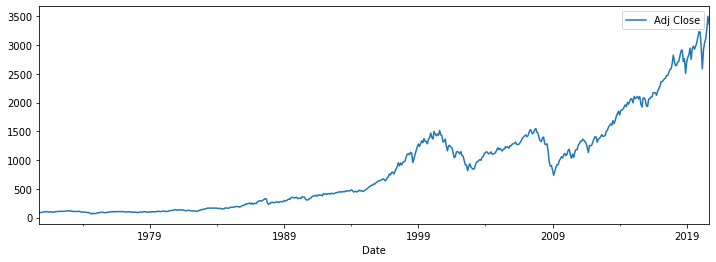

In [4]:
stock_data.plot(figsize=(12, 4))



```
# Convert a feature into a one-dimensional Numpy Array
y = stock_data["Adj Close"].values
y
```



In [5]:
y = stock_data["Adj Close"].values
y

array([  83.25    ,   87.199997,   92.150002,   95.879997,   96.75    ,
        100.309998,  103.949997,   99.629997,   98.699997,   95.580002,
         99.029999,   98.339996,   94.230003,   93.989998,  102.089996,
        103.940002,  106.57    ,  107.199997,  107.669998,  109.529999,
        107.139999,  107.389999,  111.089996,  110.550003,  111.580002,
        116.669998,  118.050003,  116.029999,  111.68    ,  111.519997,
        106.970001,  104.949997,  104.260002,  108.220001,  104.25    ,
        108.43    ,  108.290001,   95.959999,   97.550003,   96.57    ,
         96.220001,   93.980003,   90.309998,   87.279999,   86.      ,
         79.309998,   72.150002,   63.540001,   73.900002,   69.970001,
         68.559998,   76.980003,   81.589996,   83.360001,   87.300003,
         91.150002,   95.190002,   88.75    ,   86.879997,   83.870003,
         89.040001,   91.239998,   90.190002,  100.860001,   99.709999,
        102.769997,  101.639999,  100.18    ,  104.279999,  103.



```
# Normalization: 
from sklearn.preprocessing import MinMaxScaler
```



In [6]:
from sklearn.preprocessing import MinMaxScaler



```
# Converts a one-dimensional Numpy Array to a two-dimensional Numpy Array
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(y.reshape(-1, 1))
y = scaler.transform(y.reshape(-1, 1))
y
```



In [7]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(y.reshape(-1, 1))
y = scaler.transform(y.reshape(-1, 1))
y

array([[-9.88529929e-01],
       [-9.86231260e-01],
       [-9.83350646e-01],
       [-9.81180006e-01],
       [-9.80673715e-01],
       [-9.78602003e-01],
       [-9.76483736e-01],
       [-9.78997724e-01],
       [-9.79538930e-01],
       [-9.81354586e-01],
       [-9.79346888e-01],
       [-9.79748430e-01],
       [-9.82140206e-01],
       [-9.82279875e-01],
       [-9.77566148e-01],
       [-9.76489553e-01],
       [-9.74959047e-01],
       [-9.74592425e-01],
       [-9.74318912e-01],
       [-9.73236500e-01],
       [-9.74627341e-01],
       [-9.74481855e-01],
       [-9.72328672e-01],
       [-9.72642917e-01],
       [-9.72043517e-01],
       [-9.69081436e-01],
       [-9.68278354e-01],
       [-9.69453878e-01],
       [-9.71985324e-01],
       [-9.72078437e-01],
       [-9.74726270e-01],
       [-9.75901794e-01],
       [-9.76303331e-01],
       [-9.73998842e-01],
       [-9.76309152e-01],
       [-9.73876635e-01],
       [-9.73958106e-01],
       [-9.81133449e-01],
       [-9.8



```
# Convert a two-dimensional Numpy Array to a one-dimensional Pytorch Tensor
y = torch.FloatTensor(y).view(-1)
y
```



In [8]:
y = torch.FloatTensor(y).view(-1)
y

tensor([-9.8853e-01, -9.8623e-01, -9.8335e-01, -9.8118e-01, -9.8067e-01,
        -9.7860e-01, -9.7648e-01, -9.7900e-01, -9.7954e-01, -9.8135e-01,
        -9.7935e-01, -9.7975e-01, -9.8214e-01, -9.8228e-01, -9.7757e-01,
        -9.7649e-01, -9.7496e-01, -9.7459e-01, -9.7432e-01, -9.7324e-01,
        -9.7463e-01, -9.7448e-01, -9.7233e-01, -9.7264e-01, -9.7204e-01,
        -9.6908e-01, -9.6828e-01, -9.6945e-01, -9.7199e-01, -9.7208e-01,
        -9.7473e-01, -9.7590e-01, -9.7630e-01, -9.7400e-01, -9.7631e-01,
        -9.7388e-01, -9.7396e-01, -9.8113e-01, -9.8021e-01, -9.8078e-01,
        -9.8098e-01, -9.8229e-01, -9.8442e-01, -9.8618e-01, -9.8693e-01,
        -9.9082e-01, -9.9499e-01, -1.0000e+00, -9.9397e-01, -9.9626e-01,
        -9.9708e-01, -9.9218e-01, -9.8950e-01, -9.8847e-01, -9.8617e-01,
        -9.8393e-01, -9.8158e-01, -9.8533e-01, -9.8642e-01, -9.8817e-01,
        -9.8516e-01, -9.8388e-01, -9.8449e-01, -9.7828e-01, -9.7895e-01,
        -9.7717e-01, -9.7783e-01, -9.7868e-01, -9.7



```
# Separate normalized data for training and testing
test_size = 24

train_seq = y[:-test_size]
test_seq = y[-test_size:]
```



In [9]:
test_size = 24

# train_seq = y[:-test_size]
# test_seq = y[-test_size:]



```
# Plot y, train_seq and test_seq
plt.figure(figsize=(12, 4))
plt.xlim(-20, len(y)+20)
plt.grid(True)
plt.plot(y)
```



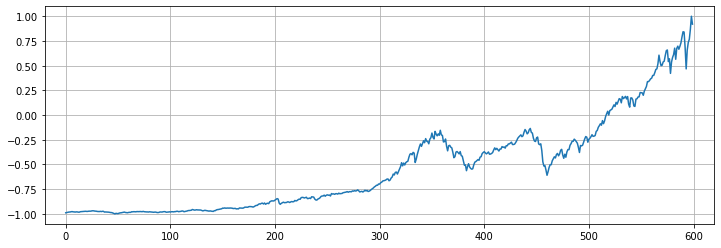

In [10]:
plt.figure(figsize=(12, 4))
plt.xlim(-20, len(y)+20)
plt.grid(True)
plt.plot(y)



```
train_window_size = 12
```



In [11]:
train_window_size = 12



```
def input_data(seq, ws):
    out = []
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window, label))
        
    return out
```



In [12]:
def input_data(seq, ws):
    out = []
    L = len(seq)

    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window, label))
    
    return out



```
train_data = input_data(train_seq, train_window_size)
```



In [13]:
# train_data = input_data(train_seq, train_window_size)
train_data = input_data(y, train_window_size)



```
print("The Number of Training Data: ", len(train_data))
```



In [14]:
# 600-24-12=564
print("The Nunber of Training Data: ", len(train_data))

The Nunber of Training Data:  588




```
class Model(nn.Module):

    
    def __init__(self, input=1, h=50, output=1):
        
        super().__init__()
        self.hidden_size = h
        
        self.lstm = nn.LSTM(input, h)
        self.fc = nn.Linear(h, output)

        self.hidden = (
            torch.zeros(1, 1, h),
            torch.zeros(1, 1, h)
        )
        
        
    def forward(self, seq):
        
        out, _ = self.lstm(
            seq.view(len(seq), 1, -1),
            self.hidden
        )

        out = self.fc(
            out.view(len(seq), -1)
        )
        
        return out[-1]
```



In [15]:
class Model(nn.Module):


    def __init__(self, input=1, h=50, output=1):
        super().__init__()
        self.hidden_size = h

        self.lstm = nn.LSTM(input, h)
        self.fc = nn.Linear(h, output)

        self.hidden = (
            torch.zeros(1, 1, h),
            torch.zeros(1, 1, h)
        )
    

    def forward(self, seq):

        out, _ = self.lstm(
            seq.view(len(seq), 1, -1),
            self.hidden
        )

        out = self.fc(
            out.view(len(seq), -1)
        )

        return out[-1]



```
torch.manual_seed(123)
model = Model()
# mean squared error loss　平均二乗誤差損失
criterion = nn.MSELoss()
# stochastic gradient descent 確率的勾配降下
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
```



In [16]:
torch.manual_seed(123)
model = Model()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)



```
epochs = 10
train_losses = []
test_losses = []
```



In [17]:
epochs = 10
train_losses = []
test_losses = []



```
def run_train():
    model.train()
    
    for train_window, correct_label in train_data:

        optimizer.zero_grad()
 
        model.hidden = (
            torch.zeros(1, 1, model.hidden_size),
            torch.zeros(1, 1, model.hidden_size)           
        )
 
        train_predicted_label = model.forward(train_window)
        train_loss = criterion(train_predicted_label, correct_label)
 
        train_loss.backward()
        optimizer.step()
 
        train_losses.append(train_loss)
```



In [18]:
def run_train():
    model.train()

    for train_window, correct_label in train_data:

        optimizer.zero_grad()

        model.hidden = (
            torch.zeros(1, 1, model.hidden_size),
            torch.zeros(1, 1, model.hidden_size)
        )

        train_predicted_label = model.forward(train_window)
        train_loss = criterion(train_predicted_label, correct_label)

        train_loss.backward()
        optimizer.step()

        train_losses.append(train_loss)



```
# Extract the value of an element from a one-dimensional Tensor with a single element
a = torch.tensor([3])
a
# a.item()
```



In [19]:
a = torch.tensor([3])
a.item()

3



```
def run_test():
    model.eval()
    
    for i in range(test_size):
 
        test_window = torch.FloatTensor(extending_seq[-test_size:])
 
 
        # print()
        # print("The Length of Extending Sequence: ", len(extending_seq))
        # print("The Length of window", len(test_window))
        # print()
 

        # Stop storing parameters by not computing the slope, so as not to consume memory
        with torch.no_grad():
 
            model.hidden = (
                torch.zeros(1, 1, model.hidden_size),
                torch.zeros(1, 1, model.hidden_size)           
            )
 
            test_predicted_label = model.forward(test_window)
            extending_seq.append(test_predicted_label.item())
    
    test_loss = criterion(
        torch.FloatTensor(extending_seq[-test_size:]),
        y[len(y)-test_size:]
    )
 
    test_losses.append(test_loss)
```



In [20]:
def run_test():
    model.eval()

    for i in range(test_size):

        test_window = torch.FloatTensor(extending_seq[-test_size:])

        with torch.no_grad():

            model.hidden = (
                torch.zeros(1, 1, model.hidden_size),
                torch.zeros(1, 1, model.hidden_size)
            )  
        
            test_predicted_label = model.forward(test_window)
            extending_seq.append(test_predicted_label.item())
    
    test_loss = criterion(
        torch.FloatTensor(extending_seq[-test_size:]),
        y[len(y)-test_size:]
    )

    test_losses.append(test_loss)



```
train_seq[-test_size:]
```



In [21]:
# train_seq[-test_size:]



```
train_seq[-test_size:].tolist()
```



In [22]:
# train_seq[-test_size:].tolist()



```
for epoch in range(epochs):

    print()
    print(f'Epoch: {epoch+1}')

    run_train()

    extending_seq = train_seq[-test_size:].tolist()
    
    run_test()

    plt.figure(figsize=(12, 4))
    plt.xlim(-20, len(y)+20)
    plt.grid(True)

    plt.plot(y.numpy())
    
    plt.plot(
        range(len(y)-test_size, len(y)),
        extending_seq[-test_size:]
    )
    
    plt.show()
```




Epoch: 1


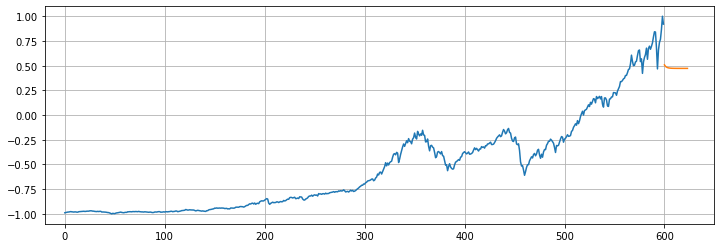


Epoch: 2


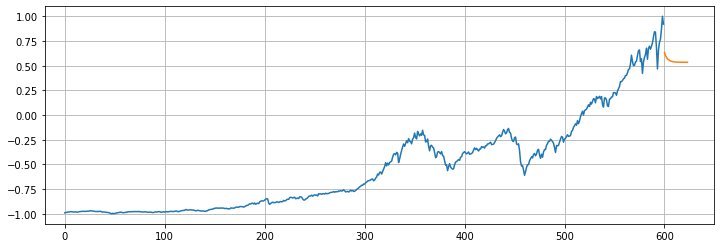


Epoch: 3


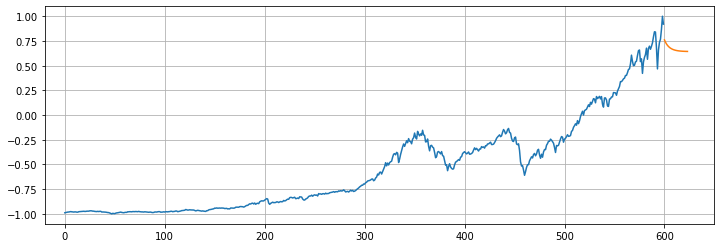


Epoch: 4


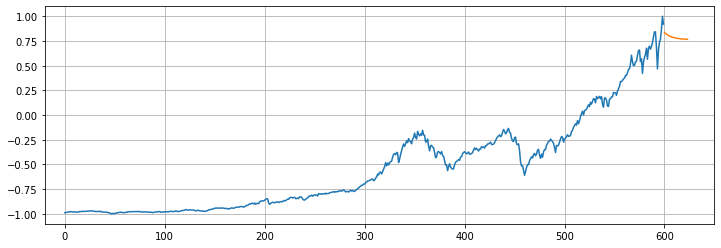


Epoch: 5


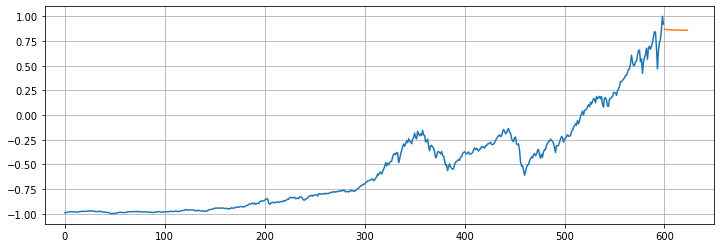


Epoch: 6


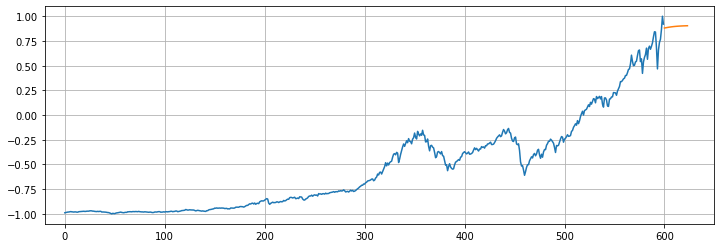


Epoch: 7


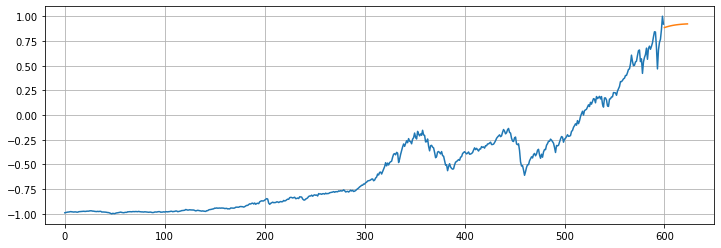


Epoch: 8


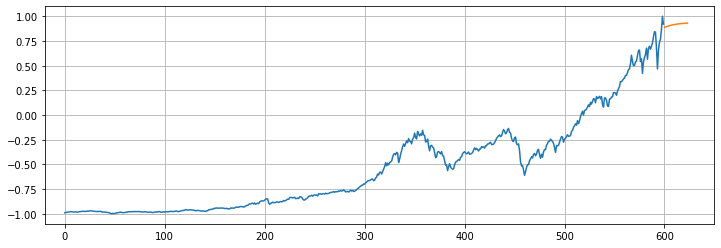


Epoch: 9


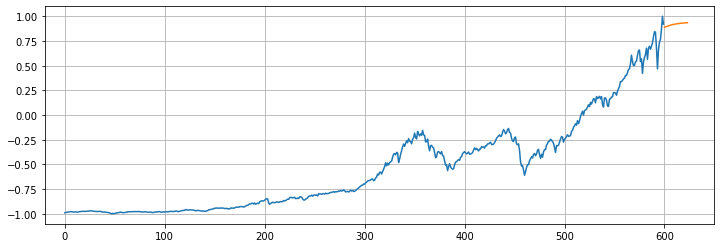


Epoch: 10


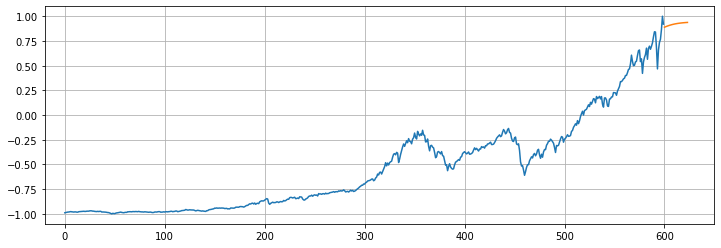

In [23]:
for epoch in range(epochs):

    print()
    print(f'Epoch: {epoch+1}')

    run_train()

    # extending_seq = train_seq[-test_size:].tolist()
    extending_seq = y[-test_size:].tolist()

    run_test()

    plt.figure(figsize=(12, 4))
    # plt.xlim(-20, len(y)+20)
    plt.xlim(-20, len(y)+50)
    plt.grid(True)

    plt.plot(y.numpy())

    plt.plot(
        # range(len(y)-test_size, len(y)),
        range(len(y), len(y)+test_size),
        extending_seq[-test_size:]
    )

    plt.show()



```
plt.plot(train_losses)
```



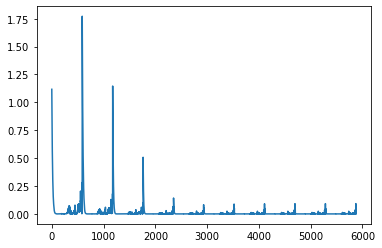

In [24]:
plt.plot(train_losses)



```
plt.plot(test_losses)
```



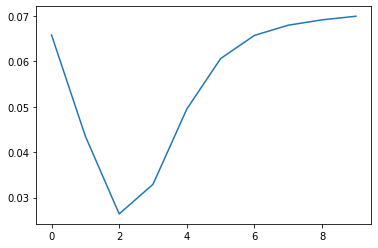

In [25]:
plt.plot(test_losses)



```
# List
predicted_normalized_labels_list  = extending_seq[-test_size:]
predicted_normalized_labels_list
```



In [26]:
predicted_normalized_labels_list = extending_seq[-test_size:]



```
# Convert a list to a one-dimensional Numpy Array
predicted_normalized_labels_array_1d = np.array(predicted_normalized_labels_list)
predicted_normalized_labels_array_1d
```



In [27]:
predicted_normalized_labels_array_1d = np.array(predicted_normalized_labels_list)
predicted_normalized_labels_array_1d

array([0.88901085, 0.89315611, 0.89713854, 0.90095729, 0.90455621,
       0.90791339, 0.9110232 , 0.91388959, 0.91652697, 0.91894466,
       0.92115957, 0.92318779, 0.92504281, 0.92673844, 0.92828709,
       0.92970115, 0.93099284, 0.93217504, 0.93325788, 0.93424332,
       0.9351415 , 0.93596035, 0.93670577, 0.93738359])



```
# Converts a one-dimensional Numpy Array to a two-dimensional Numpy Array
predicted_normalized_labels_array_2d = predicted_normalized_labels_array_1d.reshape(-1, 1)
predicted_normalized_labels_array_2d
```



In [28]:
predicted_normalized_labels_array_2d = predicted_normalized_labels_array_1d.reshape(-1, 1)
predicted_normalized_labels_array_2d

array([[0.88901085],
       [0.89315611],
       [0.89713854],
       [0.90095729],
       [0.90455621],
       [0.90791339],
       [0.9110232 ],
       [0.91388959],
       [0.91652697],
       [0.91894466],
       [0.92115957],
       [0.92318779],
       [0.92504281],
       [0.92673844],
       [0.92828709],
       [0.92970115],
       [0.93099284],
       [0.93217504],
       [0.93325788],
       [0.93424332],
       [0.9351415 ],
       [0.93596035],
       [0.93670577],
       [0.93738359]])



```
# From a normalized number to a true number.
predicted_labels_array_2d = scaler.inverse_transform(predicted_normalized_labels_array_2d)
predicted_labels_array_2d
```



In [29]:
predicted_labels_array_2d = scaler.inverse_transform(predicted_normalized_labels_array_2d)
predicted_labels_array_2d

array([[3309.58795944],
       [3316.71112012],
       [3323.55445916],
       [3330.11654265],
       [3336.30088742],
       [3342.06980154],
       [3347.41365719],
       [3352.33921433],
       [3356.8712595 ],
       [3361.02577081],
       [3364.83183659],
       [3368.31711125],
       [3371.50474255],
       [3374.4184928 ],
       [3377.07966613],
       [3379.50956668],
       [3381.72919132],
       [3383.76066356],
       [3385.62139545],
       [3387.31476697],
       [3388.85819015],
       [3390.26528734],
       [3391.5461985 ],
       [3392.71096114]])



```
len(predicted_labels_array_2d)
```



In [30]:
len(predicted_labels_array_2d)

24



```
stock_data["Adj Close"][-test_size:]
```



In [31]:
stock_data["Adj Close"][-test_size:]

Date
2018-10-01    2711.739990
2018-11-01    2760.169922
2018-12-01    2506.850098
2019-01-01    2704.100098
2019-02-01    2784.489990
2019-03-01    2834.399902
2019-04-01    2945.830078
2019-05-01    2752.060059
2019-06-01    2941.760010
2019-07-01    2980.379883
2019-08-01    2926.459961
2019-09-01    2976.739990
2019-10-01    3037.560059
2019-11-01    3140.979980
2019-12-01    3230.780029
2020-01-01    3225.520020
2020-02-01    2954.219971
2020-03-01    2584.590088
2020-04-01    2912.429932
2020-05-01    3044.310059
2020-06-01    3100.290039
2020-07-01    3271.120117
2020-08-01    3500.310059
2020-09-01    3363.000000
Name: Adj Close, dtype: float64



```
len(stock_data["Adj Close"][-test_size:])
```



In [32]:
len(stock_data["Adj Close"][-test_size:])

24



```
stock_data.index
```



In [33]:
stock_data.index

DatetimeIndex(['1970-10-01', '1970-11-01', '1970-12-01', '1971-01-01',
               '1971-02-01', '1971-03-01', '1971-04-01', '1971-05-01',
               '1971-06-01', '1971-07-01',
               ...
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', name='Date', length=600, freq=None)



```
# Either way of writing works.
x_2018_10_to_2020_09 = np.arange('2018-10', '2020-10', dtype='datetime64[M]')
# x_2018_10_to_2020_09 = np.arange('2018-10-01', '2020-10-31', dtype='datetime64[M]')

x_2018_10_to_2020_09
```



In [34]:
# x_2018_10_to_2020_09 = np.arange('2018-10', '2020-10', dtype='datetime64[M]')
# x_2018_10_to_2020_09

x_2020_10_to_2022_09 = np.arange('2020-10', '2022-10', dtype='datetime64[M]')
x_2020_10_to_2022_09

array(['2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03',
       '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
       '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03',
       '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09'],
      dtype='datetime64[M]')



```
len(x_2018_10_to_2020_09)
```



In [35]:
# len(x_2018_10_to_2020_09)
len(x_2020_10_to_2022_09)

24



```
fig = plt.figure(figsize=(12, 4))
plt.title('Stock Price Prediction')
plt.ylabel('Price')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
fig.autofmt_xdate()

plt.plot(stock_data["Adj Close"]['2016-01':])
plt.plot(x_2018_10_to_2020_09, predicted_labels_array_2d)
plt.show()
```



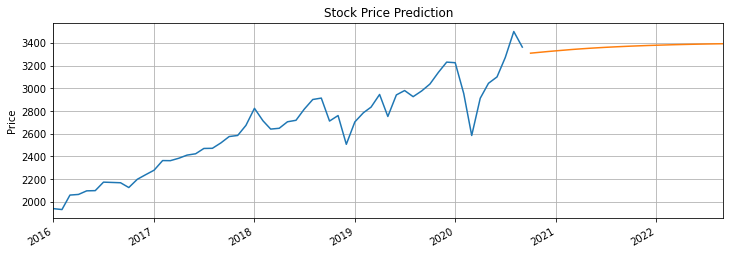

In [36]:
fig = plt.figure(figsize=(12, 4))
plt.title('Stock Price Prediction')
plt.ylabel('Price')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
fig.autofmt_xdate()

plt.plot(stock_data["Adj Close"]['2016-01':])
# plt.plot(x_2018_10_to_2020_09, predicted_labels_array_2d)
plt.plot(x_2020_10_to_2022_09, predicted_labels_array_2d)
plt.show()